In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The Arithmetic-Geometric Function

The AGM function is defined in terms of two sequences, defined recursively as follows:

- Let $x_0$, $y_0$ be arbitrary nonnegative real numbers.
- Define two sequences $(x_n)$, $(y_n)$ recursively by:
$$
x_{n+1}=\frac{x_n+y_n}{2},\quad y_{n+1}=\sqrt{x_ny_n}
$$
It is easy to show that, if $a$ and $b$ are two nonnegative numbers, with $a\ge b$, then:
$$
a\ge \frac{a+b}{2}\ge \sqrt{ab}\ge b.
$$
Let's now assume that $x_0\ge y_0\ge 0$. Then, using the above inequalities and induction we get:
$$
x_n\ge x_{n+1}\ge y_{n+1}\ge y_{n}\ge0.
$$
This in particular, implies that:

- $(x_n)$ is a nonincreasing sequence bounded below by $0$.
- $(y_n)$ is a nondecreasing sequence bounded above by $x_0$

It follows that both sequences converge. Let:
$$
L=\lim_{n\to\infty}x_n\text{ and }M=\lim_{n\to\infty}y_n.
$$
Now, we have:
$$
L = \lim_{n\to\infty}x_{n+1}=\lim_{n\to\infty}\frac{x_n+y_n}{2}=\frac{L+M}{2},
$$
so that $L=\frac{L+M}{2}$, which implies $L=M$. We define the AGM function evaluated at $x_0$, $y_0$ as the common value of $L$ and $M$:
$$
\text{agm}(x_0,y_0)=\lim_{n\to\infty}x_n=\lim_{n\to\infty}y_n
$$

Let's now define a function that computes the AGM function for an arbitrary pair of nonnegative real numbers:

In [20]:
def agm(x, y, tol = 1e-5, maxn = 100):
    for _ in range(maxn):
        x, y = (x + y) / 2, (x * y) ** 0.5
        if np.max(np.abs(x-y)) < tol:
            return (x + y) / 2
    raise ValueError('prescribed tolerance not attained')

Here is a value of the function:

In [28]:
agm(2, 1)

(1.4567910481542587, 1.456791013939555)

Notice that we use the functions vectorized functions `np.max()` and `np.abs()`, which makes `agm()` itself to be vectorized. This helps, for example, if we want to plot the function:

In [26]:
xmin, xmax = 0, 15
ymin, ymax = 0, 15
ngrid = 51
xvalues = np.linspace(xmin, xmax, ngrid)
yvalues = np.linspace(ymin, ymax, ngrid)
xgrid, ygrid = np.meshgrid(xvalues, yvalues)
a, g = xgrid.copy(), ygrid.copy()
a, g = agm(xgrid, ygrid)

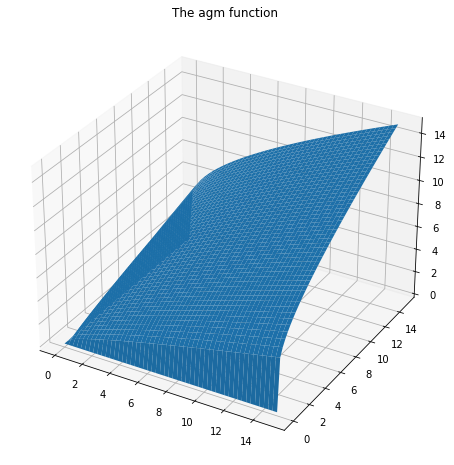

In [27]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(xgrid, ygrid, a, rstride=1, cstride=1, edgecolor='none')
ax.set_title('The agm function');